### Open AI Gym

Reinforcement Learning with CartePole

In [1]:
import gym
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import time

%matplotlib inline

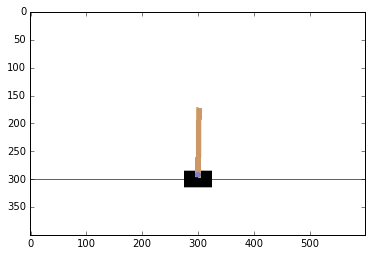

In [2]:
# ---------- Initialise CartePole -------------
env = gym.make('CartPole-v0')

obs = env.reset()
img = env.render(mode='rgb_array')
imshow(img)

In [3]:
# --------------- Parameters -----------------
# Horizontal position, velocity, angle of the pole, angular velocity
obs = env.reset()
obs

array([ 0.04721026,  0.03361397,  0.00924424,  0.03582038])

In [4]:
img.shape

(400, 600, 3)

In [5]:
# Actions available for the environment
env.action_space

Discrete(2)

In [6]:
# There are two (2) options:
#    * Accelerate left
#    * Accelerate right

action = 1    # Accelerate right

In [7]:
# --------------- Step forward  -----------------
obs, reward, done, info = env.step(action)
obs

array([ 0.04788254,  0.22860214,  0.00996064, -0.25393162])

* `obs` is the new observation
* `reward` is given 1 point at every step, the goal is to keep running as long as possible
* `done` This value will be true when the episode is over
* `info` This dictionary may provide extra debug information in other environments

In [8]:
reward, done, info

(1.0, False, {})

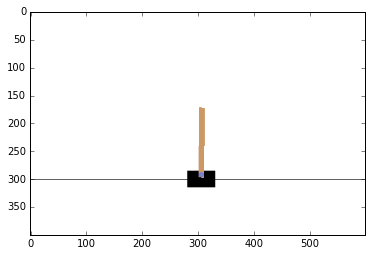

In [9]:
# Slider has moved to the right, pole angle has decreased
img = env.render(mode='rgb_array')
imshow(img)

In [10]:
# --------------- Test Strategy  -----------------
# Accelerate left when pole is leaning left, accelerate
# right when the pole is leaning right

def basic_policy(obs):
    # Unpack observation and state
    h_pos = obs[0]
    vel = obs[1]
    angle = obs[2]
    a_vel = obs[3]

    return 0 if angle < 0 else 1

totals = []
for episode in range(100):
    episode_rewards = 0
    obs = env.reset()
    for step in range(1000): # 1000 steps max
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

print('First 10 Scores:', totals[:10])
print('\nMean:', np.mean(totals), '\n Max:', np.max(totals), '\n Min:', np.min(totals))

First 10 Scores: [53.0, 40.0, 51.0, 45.0, 48.0, 26.0, 39.0, 39.0, 25.0, 39.0]

Mean: 41.98 
 Max: 66.0 
 Min: 24.0


In [24]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [25]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [26]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

In [27]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)

    # hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1

    obs, reward, done, info = env.step(action)
    if done:
        break

<IPython.core.display.Javascript object>


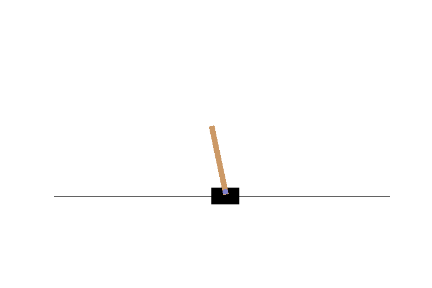

In [47]:
video = plot_animation(frames)
plt.show()